<img src="fig-serie-tiempo.jpg">

## Introducción

Una serie temporal o cronológica es una sucesión de datos medidos en determinados momentos y ordenados cronológicamente. Los datos pueden estar espaciados a intervalos iguales o desiguales.

### Contexto 

**Series de tiempo**
- Media móvil simple
- Media móvil ponderada
- Suavizamiento exponencial
- Medición del error del pronóstico



### Importamos librerias


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error as MSE

### Leemos la base de datos

In [6]:
df = pd.read_csv('analisis_data_2022.csv');
df.head();

## Media móvil simple

La media móvil simple (MMS) es un cálculo directo de los valores medios de un número determinado de períodos temporales, por ejemplo calcular la MMS para un período de diez días, tomarías los valores de los últimos diez días y dividirías el resultado entre diez.

### MMS | Media móvil simple

In [11]:
df['MMS'] = df.iloc[:,4].rolling(window = 3).mean();
df['MMS'] = df['MMS'].shift(1);
df[['Total', 'MMS']];

## Media móvil ponderada

Media Móvil Ponderada (MMP) es un tipo de media móvil asigna mayor peso a los datos más recientes y menos a los datos pasados. Por ejemplo, en una media móvil ponderada de tres sesiones, el primer dato se multiplica por uno, el segundo por dos y el tercero por tres.

**Ecuación**:
1x + 2x + 3x = 1 => 1(1/6) + 2(1/6) + 3(1/6) = 1

### MMP | Media móvil ponderado

In [18]:
p = [1/6, 1/3, 1/2];
df['MMP'] = df.iloc[:,4].rolling(window = 3).apply(lambda x: (x*p).sum());
df['MMP'] = df['MMP'].shift(1);
df[['Total', 'MMS', 'MMP']];

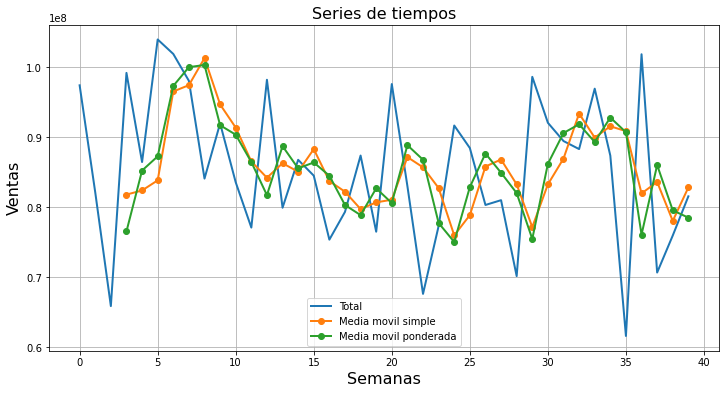

In [14]:
plt.figure(figsize = [12, 6])
plt.grid()
plt.title('Series de tiempos', fontsize = 16)
plt.xlabel('Semanas',fontsize = 16)
plt.ylabel('Ventas', fontsize = 16)
plt.plot(df['Total'], label = 'Total', lw = '2')
plt.plot(df['MMS'],'-o', label = 'Media movil simple', lw = '2')
plt.plot(df['MMP'],'-o', label = 'Media movil ponderada', lw = '2')
plt.legend()
plt.show()

### Suavizamiento exponencial

El método de suavización exponencial utiliza los promedios históricos de una variable en un período para intentar predecir su comportamiento futuro, por ejemplo: incluye una demanda real (Do) y un pronóstico (Po). Por otro lado, también se tiene en cuenta el factor de suavización (alfa) expresado en tantos por uno. La fórmula sería esta: P1 = Po + alfa(Do - Po)

In [19]:
exp1 = ExponentialSmoothing(df['Total']).fit(smoothing_level=0.5, optimized = False)
exp2 = ExponentialSmoothing(df['Total']).fit(smoothing_level=0.3, optimized = False)
exp3 = ExponentialSmoothing(df['Total']).fit(smoothing_level=0.1, optimized = False)
df['SEXP_1'] = exp1.fittedvalues
df['SEXP_2'] = exp2.fittedvalues
df['SEXP_3'] = exp3.fittedvalues

In [36]:
df[['Total', 'SEXP_1', 'SEXP_2', 'SEXP_3']];

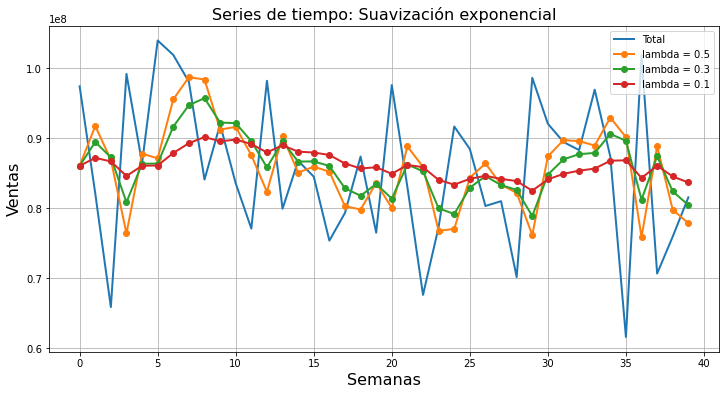

In [30]:
plt.figure(figsize = [12, 6])
plt.grid()
plt.title('Series de tiempo: Suavización exponencial', fontsize = 16)
plt.xlabel('Semanas',fontsize = 16)
plt.ylabel('Ventas', fontsize = 16)
plt.plot(df['Total'], label = 'Total', lw = '2')
plt.plot(df['SEXP_1'],'-o', label = 'lambda = 0.5', lw = '2')
plt.plot(df['SEXP_2'],'-o', label = 'lambda = 0.3', lw = '2')
plt.plot(df['SEXP_3'],'-o', label = 'lambda = 0.1', lw = '2')
plt.legend()
plt.show()

## Error cuadrático medio (MSE)

MSE es una medida de dispersión del error de pronóstico, sin embargo esta medida maximiza el error al elevar al cuadrado, castigando aquellos periodos donde la diferencia fue más alta a comparación de otros.

In [33]:
y_data = df['Total']
y_MMS = df['MMS']
y_MMP = df['MMP']
y_SEXP_1 = df['SEXP_1']

### MSE | media móvil

In [26]:
MSE(y_data[3:], y_MMS.dropna())

132324727737919.6

### MSE | media móvil ponderada

In [34]:
MSE(y_data[3:], y_MMP.dropna())

146304451430598.4

### MSE | Suavización exponencial

In [31]:
MSE(y_data, y_SEXP_1)

150606198168507.8